# Aprendizaje por refuerzo profundo - Libreta 3
*por Roberto-Esteban López-Díaz*


Obetivos de esta libreta:
- Escribir un agente a partir de un objeto abstracto para interactuar con el entorno gridWorld y gym
- Inicializar un agente aleatorio
- Diseñar un agente tabular

In [ ]:
# Ejecutar una vez
!pip install gif
!git clone https://github.com/Bobobert/RL_Toy
!pip install /content/RL_Toy/

In [2]:
# Importar librerias
import matplotlib.pyplot as plt
import numpy as np
#from RL_Toy.envs import gridWorld
from RL_Toy.base import Policy, Environment, ActionSpace
from RL_Toy.policies import gridPolicy
from RL_Toy.envs import stochasticGridWorld

## Definiendo un Entorno

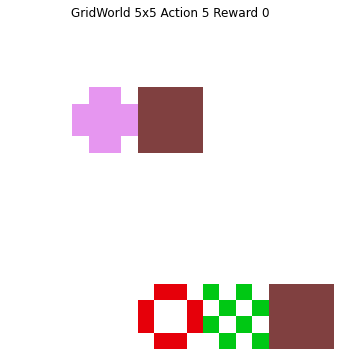

In [9]:
env = stochasticGridWorld(5,5, (1,1),(4,3),"8C",200)
env.addObstacles((4,4),(1,2))
env.addVortex((4,2,0.5))
env.reset()
env.render()

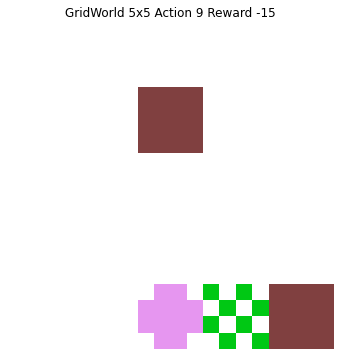

In [15]:
env.step(9)
env.render()

In [17]:
env.gameOver

True

In [18]:
env.reset()
env.step(0)

AssertionError: ignored

## Clase abstracta de Agente

In [75]:
class Agent:
    policy = None
    env, env_test = None, None
    name = "base_Agent_v0"
    done, lastObservation = True, None
    episodeSteps, episodeReward = 0, 0.0
    def __init__(self):
        assert self.env is not None, \
            "Agent needs environment reference"
        assert self.policy is not None, \
            "Agent needs policy object"

    def processObs(self, obs):
        """
        Method for each agent to process the
        observation if need for the policy or another
        further methods
        """
        return obs
    
    def processAction(self, action_raw):
        """
        If needed, this method should process and adecuate
        the action signla properly for the environment
        """
        return action_raw

    def processReward(self, reward_raw):
        """
        If need, this method should process the 
        reward, still returns (int or float)
        """
        return reward_raw

    def step(self, **kwargs):
        """
        Execute a step on the environment with 
        the given policy
        
        returns
        action, reward, steps, done, info
        """
        env, pi = self.env, self.policy
        if self.done:
            obs = env.reset()
            self.done = False
            self.episodeReward = 0.0
            self.episodeSteps = 0
        else:
            obs = self.lastObservation

        state = self.processObs(obs)
        action_raw = pi.getAction(state)
        action = self.processAction(action_raw)
        nextObs, reward, done = env.step(action)

        # Save reward
        r = self.processReward(reward)
        self.episodeSteps += 1
        self.episodeReward += r

        self.lastObservation = nextObs
        self.done = done

        return state, action, reward, self.episodeSteps, done 
    
    def test(self, **kwargs):
        """
        Execute a test on the environment with 
        the actual policy
        """
        tryPiTest = True
        try:
            self.policy.test = True
        except AttributeError:
            tryPiTest = False
        pi = self.policy

        if self.env_test is None:
            env = self.env
            self.done = True
        else:
            env = self.env_test

        n_test = kwargs.get("n_test", 10)
        tests_results, tests_steps = [], []
        for i in range(n_test):
            done = False
            obs = env.reset()
            test_return, test_steps = 0.0, 0
            while not done:
                state = self.processObs(obs)
                ar = pi.getAction(state)
                obs, reward, done = env.step(self.processAction(ar))
                test_return += reward
                test_steps += 1
            tests_results += [test_return]
            tests_steps += [test_steps]

        if tryPiTest:
            self.policy.test = False

        return tests_results, tests_steps

    def update(self):
        for i in range()
            args = self.step()
            train(args, self.policy)


In [76]:
env.step(**{"action":5})

({'agent': (4, 2), 'grid': array([[0, 0, 0, 0, 0],
         [0, 0, 2, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 3, 1, 2]], dtype=uint8)}, 0, True)

In [77]:
class Policy:
    """
    Policy base class.
    """

    test = False
    greedy = False
    _eps_ = 0.0
    
    def getAction(self, state):
        """
        Calculates and returns the corresponding 
        action for the state given.
        """
        raise NotImplementedError

    def update(self, state, action):
        """
        Update the action per state manner of the policy
        """
        raise NotImplementedError
    
    @property
    def epsilon(self):
        return self._eps_
    
    @epsilon.setter
    def epsilon(self, X):
        if (X >= 0) and (X <= 1):
            self._eps_ = X
        else:
            print("Invalid Epsilon, remain the same {}".format(self._eps_))


In [78]:
class RandomPolicy(Policy):
    def __init__(self, mode = "4C"):
        if mode == "4C":
            self.upper = 6
        elif mode == "8C":
            self.upper = 10
        else:
            raise ValueError("8C o 4C, only")
        
    def getAction(self, obs):
        return np.random.randint(1, self.upper)

In [79]:
np.random.randint(1,3)

1

In [80]:
env.movMode

'8C'

In [81]:
class agent7(Agent):
    def __init__(self, env):
        self.policy = RandomPolicy(mode = env.movMode)
        self.env = env
        super().__init__()

In [82]:
agent = agent7(env)

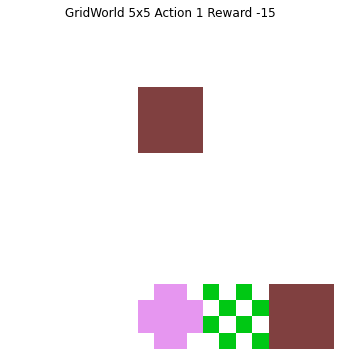

In [96]:
agent.step()
env.render()

In [86]:
returns, steps = agent.test(n_test = 30)

In [87]:
returns

[-21.0,
 -17.0,
 -59.0,
 -31.0,
 -41.0,
 -29.0,
 -29.0,
 -34.0,
 -21.0,
 -25.0,
 -38.0,
 -61.0,
 -46.0,
 -29.0,
 -29.0,
 -49.0,
 -18.0,
 -25.0,
 -34.0,
 -23.0,
 -38.0,
 -41.0,
 -29.0,
 -57.0,
 -18.0,
 -27.0,
 -26.0,
 -36.0,
 -105.0,
 -25.0]

In [88]:
np.mean(returns)

-35.36666666666667

In [89]:
np.std(returns)

17.436519785273155

In [90]:
min(returns), max(returns)

(-105.0, -17.0)

In [97]:
min(steps), max(steps)

(3, 91)

In [98]:
np.mean(steps)

21.366666666666667

In [103]:
class TabPolicy(RandomPolicy):
    def __init__(self, env):
        self.values = {}
        super().__init__(env.movMode)

    def getAction(self, obs):
        return self.values.get(obs, super().getAction(obs))

    def update(self, obs, action):
        self.values[obs] = obs


In [104]:
class agent8(Agent):
    def __init__(self, env):
        self.policy = TabPolicy(env)
        self.env = env
        super().__init__()

    def processObs(self, obs):
        # la observación del entorno gridWorl devuelve
        # un diccionario {"agent", grid:""}
        # para este agente la suposicion será que el grid es
        # siempre igual entonces
        return obs["agent"] # Tuplas como "agent" son hashable

In [105]:
agent = agent8(env)

In [109]:
results, steps = agent.test(n_test = 30)

In [110]:
np.mean(results) # Deberian ser similares al del otro agente
# dado que no hemos modificado la política aun, por lo tanto es solo aleatoria

-38.733333333333334